In [1]:
# import libraries
import numpy as np
import pandas as pd
from inference.confidenceInterval import confidenceInterval
from inference.abTesting import abTesting

In [2]:
# import  Student Survey Data from MASS package
#link to data: https://vincentarelbundock.github.io/Rdatasets/datasets.html
survey = pd.read_csv('survey.csv',index_col= 0)
survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


### Description
    This data contains the responses of 237 Statistics I students at the University of Adelaide to a number of questions.
    survey data is thus a sample of the entire Statistics I students at the University of Adelaide.

In [3]:
# drop NaN values
survey.dropna(axis=0, how='any', inplace =True)
survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.80,Imperial,17.583
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64.0,Right,Some,Never,172.72,Imperial,21.000
7,Male,17.7,17.7,Right,L on R,83.0,Right,Freq,Never,182.88,Imperial,18.833



### Estimate the population parameters of all students in the university by computing their confidence interval
1. Let's first take one variable: the Height of students sample and estimate the mean **$\mu$** of all students in the university

In [5]:
# Height is a numpy araay now
Height = survey.Height.values 
# Instanciate a confidenceInterval object with a default settings
ci_95 = confidenceInterval(Height)

In [23]:
ci_95

Your are about estimate the population mean within an interval, with confidence of=95.0,
it is a one sample test,
The number of bootstrap samples is 10000

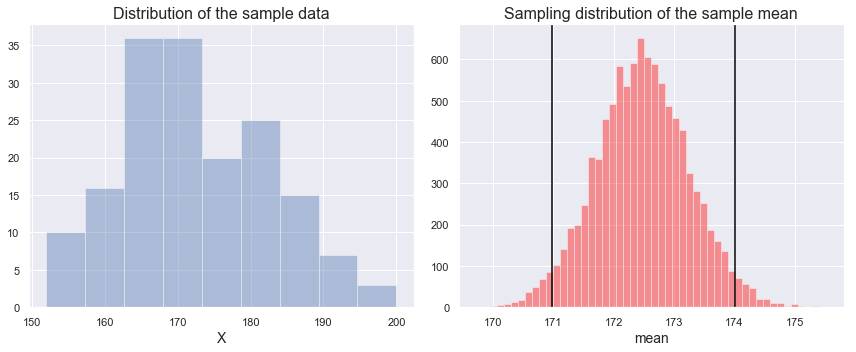

defaultdict(str,
            {'sample mean': 172.47630952380956,
             'confidence interval': [170.98392857142858, 174.00383035714285],
             'interpretation': 'A point estimate for the true mean in the population is 172.47630952380956,\n and we are 95.0% confident that the true population mean is between 170.98392857142858 and 174.00383035714285'})

In [24]:
ci_95.result

2. Let's now estimate the median of the height of all student

In [25]:
# Instanciate a confidenceInterval object with a different settings
ci_99 = confidenceInterval(Height, statistic = 'median', CI = 0.99)

In [26]:
ci_99

Your are about estimate the population median within an interval, with confidence of=99.0,
it is a one sample test,
The number of bootstrap samples is 10000

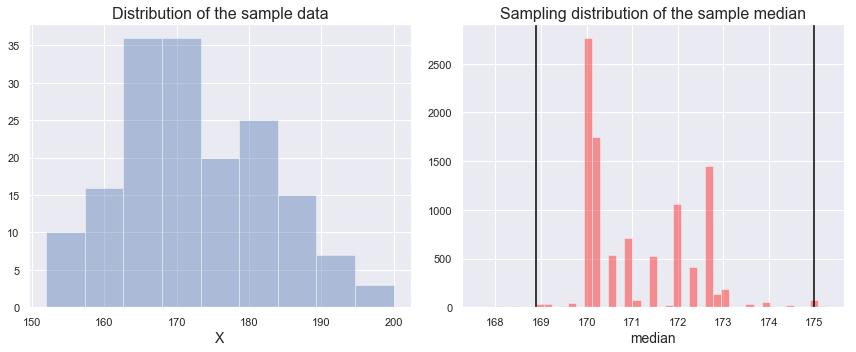

defaultdict(str,
            {'sample median': 170.59,
             'confidence interval': [168.9, 175.0],
             'interpretation': 'A point estimate for the true median in the population is 170.59,\n and we are 99.0% confident that the true population median is between 168.9 and 175.0'})

In [27]:
ci_99.result

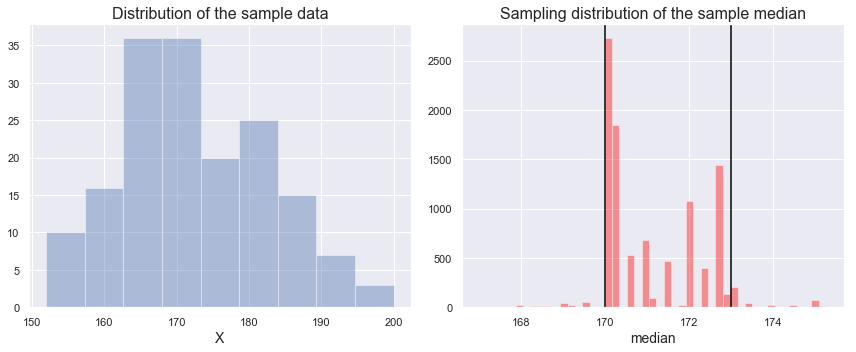

defaultdict(str,
            {'sample median': 170.59,
             'confidence interval': [170.0, 173.0],
             'interpretation': 'A point estimate for the true median in the population is 170.59,\n and we are 95.0% confident that the true population median is between 170.0 and 173.0'})

In [28]:
# Instanciate a confidenceInterval object with a different settings
ci_95 = confidenceInterval(Height, statistic = 'median')
ci_95.result

3. Estimate the standard deviation of the entire students population

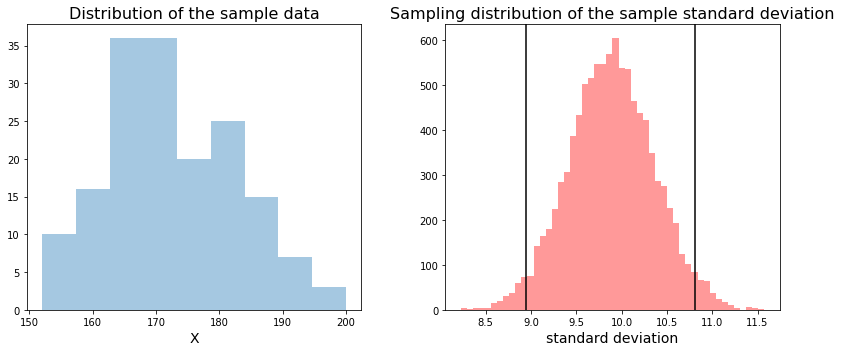

defaultdict(str,
            {'sample standard deviation': 9.929856527971578,
             'confidence interval': [8.94922656909734, 10.806577112214947],
             'interpretation': 'A point estimate for the true standard deviation in the population is 9.929856527971578, and we are 95.0% confident that the true population standard deviation is between 8.94922656909734 and 10.806577112214947'})

In [10]:
# Instanciate a confidenceInterval object with a different settings
ci_95 = confidenceInterval(Height, statistic = 'standard deviation')
ci_95.result

In [6]:
ci_95.statistic_type

['mean',
 'proportion',
 'median',
 'q25',
 'q75',
 'iqr',
 'standard deviation',
 'variance']

    As you can see the default statistics are stored in statistic_type. 
    If your statistic is not between them, you can add new statistic. 
    The following cell show you how to add a new statistic.
    Let's suppose we wants to estimate the range of the all students height

In [7]:
# Instanciate a confidenceInterval object with new statistic, its correspond function must be a lambda 
ci_95 = confidenceInterval(Height, new_statistic = 'range' , new_statistic_func = lambda x: max(x)-min(x), nb_samples =100000)

In [8]:
ci_95

Your are about estimate the population range within an interval, with confidence of=95.0,
it is a one sample test,
The number of bootstrap samples is 100000

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


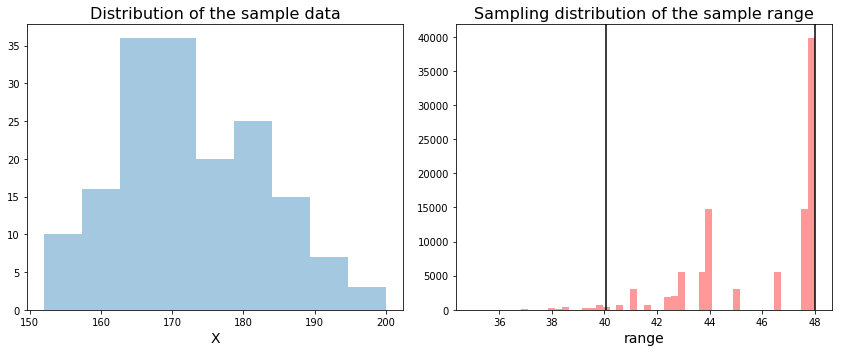

defaultdict(str,
            {'sample range': 48.0,
             'confidence interval': [40.06, 48.0],
             'interpretation': 'A point estimate for the true range in the population is 48.0, and we are 95.0% confident that the true population range is between 40.06 and 48.0'})

In [9]:
ci_95.result

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


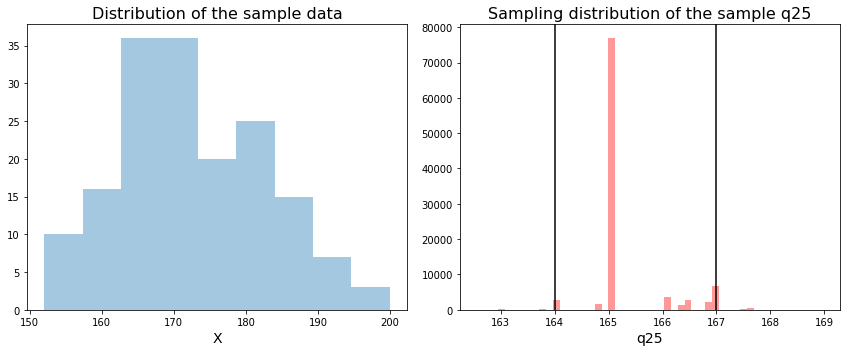

defaultdict(str,
            {'sample q25': 165.0,
             'confidence interval': [164.0, 167.0],
             'interpretation': 'A point estimate for the true q25 in the population is 165.0, and we are 95.0% confident that the true population q25 is between 164.0 and 167.0'})

In [5]:
# Instanciate a confidenceInterval object with a different settings
ci_95 = confidenceInterval(Height, statistic = 'q25', nb_samples = 100000)
ci_95.result

# AB Testing
Hypothesis testing is an important method in inferencial statistics. A hypothesis test evaluates two hypotheses and decide which one is supported by the data collected. What we do now is to use our students survey data to apply an AB test.

In the data below, you can see the column names: Wr.Hnd and NW.Hnd.
The documentation about this data says:
  1. Wr.Hnd :span (distance from tip of thumb to tip of little finger of spread hand) of writing hand, in centimetres. 
  2. NW.Hnd: span of non-writing hand. 
 
We define the null hypothesis ( the hypothesis that we believe is true ) as there is no difference between Wr.Hnd and NW.Hnd, so the alternative hypothesis is: there is a diference between the two distance. We formulate the probelm as follows:

$ H_{0}: \mu_{Wr.Hnd} - \mu_{NW.Hnd} = 0 $

$ H_{1}: \mu_{Wr.Hnd} - \mu_{NW.Hnd} \ne 0 $



In [4]:
survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.80,Imperial,17.583
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64.0,Right,Some,Never,172.72,Imperial,21.000
7,Male,17.7,17.7,Right,L on R,83.0,Right,Freq,Never,182.88,Imperial,18.833


Let's work out right hand students. After we can test 

In [6]:
# NW = survey[survey['W.Hnd'] == 'Right']['NW.Hnd'].values
# Wr = survey[survey['W.Hnd'] == 'Right']['Wr.Hnd'].values

NW = survey['NW.Hnd'].values
Wr = survey['Wr.Hnd'].values

In [7]:
# instanciate an abTesting object
ab = abTesting(Wr, NW, test_type = 'two_tailed')

In [8]:
ab

You are about to apply an A/B testing with the following settings:
it is a two samples test two_tailed,
Using simulate the null hypothesis method,
Type I error(alpha) is set to 0.05 and the number of bootstrap samples is 10000

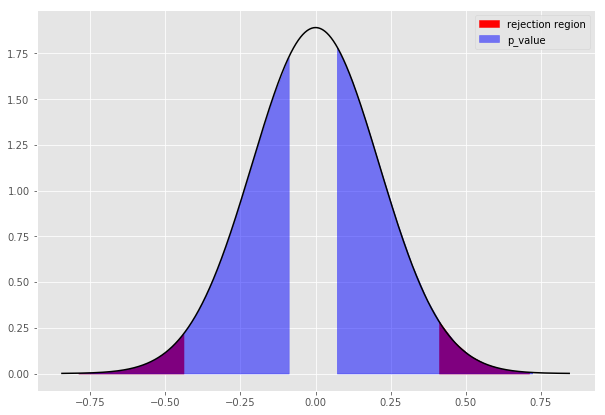

defaultdict(str,
            {'difference in means': 0.07083333333333286,
             'probability_value': 0.7367,
             'ab testing interpretation': ' We fail to reject the null hypothesis, p_value is equal to 0.7367 and it is > 0.05'})

In [9]:
ab.result

The method used above to AB test is by simulate the null hypothesis. There is another method by contructing the confidence interval and will see if the null hypothesis falls within this interval.

In [10]:
ab = abTesting(Wr, NW, test_type = 'two_tailed', is_simulate_null_method = False)

In [11]:
ab

You are about to apply an A/B testing with the following settings:
it is a two samples test two_tailed,
Using confidence interval method,
Type I error(alpha) is set to 0.05 and the number of bootstrap samples is 10000

In [12]:
ab.result

defaultdict(str,
            {'difference in means': 0.07083333333333286,
             'confidence interval': [-0.35059523809523796, 0.4839285714285708],
             'ab testing interpretation': ' we fail to reject the null hypothesis, population mean = 0 is within the confidence interval'})